In [191]:
%load_ext autoreload
%autoreload 2

import tools
import numpy as np
import pandas as pd
import standardization
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
trn = tools.dataloader("../TrainingData/neodata/fault_all_500.csv",'target')
tst = tools.dataloader("../TestData/neodata/fault_all_500.csv",'target')

scaler = standardization.scaler(trn.X)
trn = trn.apply(scaler.transform)
tst = tst.apply(scaler.transform)

In [193]:
trn_means = [trn.get({'target':i}).X.mean() for i in range(21)]
tst_means = [tst.get({'target':i}).X.mean() for i in range(21)]

In [235]:
trn_matrix = np.zeros((21,21))
tst_matrix = np.zeros((21,21))

for m in range(21):
    for n in range(21):
        trn_matrix[m,n] = np.log10(np.linalg.norm((trn_means[m] - trn_means[n]),2))
        tst_matrix[m,n] = np.log10(np.linalg.norm((tst_means[m] - tst_means[n]),2))

/tmp/ipykernel_42419/3636652275.py:6: RuntimeWarning: divide by zero encountered in log10
  trn_matrix[m,n] = np.log10(np.linalg.norm((trn_means[m] - trn_means[n]),2))
/tmp/ipykernel_42419/3636652275.py:7: RuntimeWarning: divide by zero encountered in log10
  tst_matrix[m,n] = np.log10(np.linalg.norm((tst_means[m] - tst_means[n]),2))


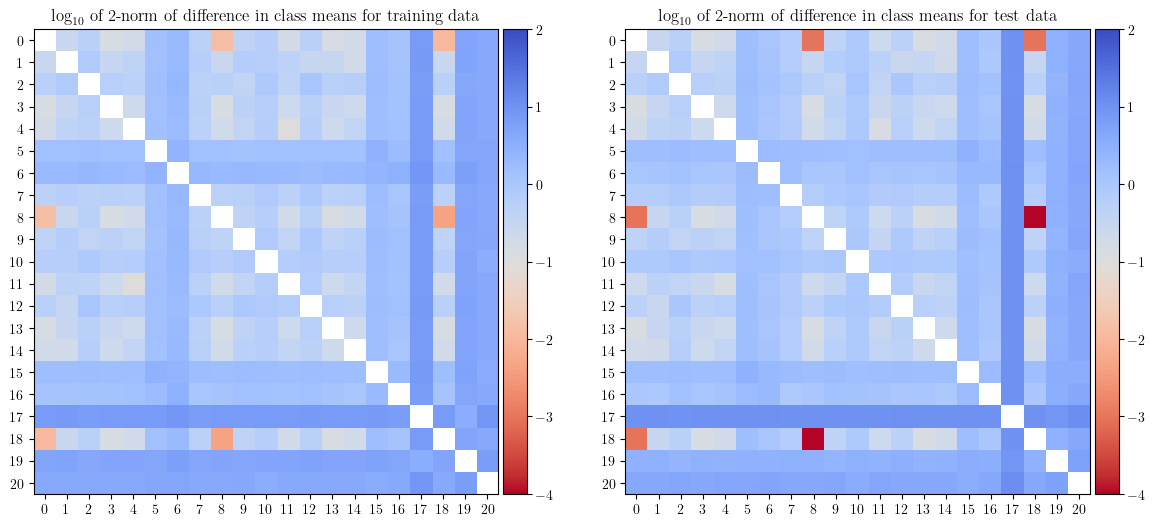

In [237]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(1,2,figsize=(14,7))
im0 = axs[0].imshow(trn_matrix,vmin = -4, vmax = 2,cmap="coolwarm_r")
im1 = axs[1].imshow(tst_matrix,vmin = -4, vmax = 2,cmap="coolwarm_r")

divider0 = make_axes_locatable(axs[0])
divider1 = make_axes_locatable(axs[1])

cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)

cbar1 = fig.colorbar(im0, cax=cax0, orientation='vertical');
cbar2 = fig.colorbar(im1, cax=cax1, orientation='vertical');

axs[0].set_yticks(range(0,21)); axs[0].set_xticks(range(0,21));
axs[1].set_yticks(range(0,21)); axs[1].set_xticks(range(0,21));

axs[0].set_title("$\log_{10}$ of 2-norm of difference in class means for training data")
axs[1].set_title("$\log_{10}$ of 2-norm of difference in class means for test data")

fig.savefig("separability_plots.pdf",bbox_inches = "tight")